## Superweight ablation

In [2]:
import sys

In [2]:
MODEL = "allenai/OLMo-7B-0724-hf"
DEVICE = "cuda:0"
LIMIT = 300

In [3]:
BASE_OUT = f"outputs/olmo7b_hellaswag_limit{LIMIT}_baseline_8bit.json"
ABL_OUT  = f"outputs/olmo7b_hellaswag_limit{LIMIT}_SW_ablation_4x.json"
RAND_OUT = f"outputs/olmo7b_hellaswag_limit{LIMIT}_random_1234.json"

In [4]:
!{sys.executable} evaluate.py \
  --model hf-outlier \
  --model_args pretrained={MODEL},load_in_8bit=True,outlier_method=manual_scaling_SO_0.0 \
  --tasks hellaswag \
  --device {DEVICE} \
  --limit {LIMIT} \
  --output_path {ABL_OUT}

2026-02-27:09:53:18 WARNING  [config.evaluate_config:281] --limit SHOULD ONLY BE USED FOR TESTING. REAL METRICS SHOULD NOT BE COMPUTED USING LIMIT.
2026-02-27:09:53:23 INFO     [_cli.run:378] Selected Tasks: ['hellaswag']
2026-02-27:09:53:23 INFO     [evaluator:213] Setting random seed to 0 | Setting numpy seed to 1234 | Setting torch manual seed to 1234 | Setting fewshot manual seed to 1234
2026-02-27:09:53:23 INFO     [evaluator:238] Initializing hf-outlier model, with arguments: {'pretrained': 'allenai/OLMo-7B-0724-hf', 'load_in_8bit': True, 'outlier_method': 'manual_scaling_SO_0.0'}
2026-02-27:09:53:24 INFO     [models.huggingface:161] Using device 'cuda:0'
config.json: 100%|█████████████████████████████| 610/610 [00:00<00:00, 2.01MB/s]
tokenizer_config.json: 5.37kB [00:00, 16.5MB/s]
tokenizer.json: 2.12MB [00:00, 18.1MB/s]
special_tokens_map.json: 100%|████████████████| 65.0/65.0 [00:00<00:00, 578kB/s]
The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be remo

## Baseline

In [5]:
!{sys.executable} evaluate.py \
  --model hf-outlier \
  --model_args pretrained={MODEL},load_in_8bit=True \
  --tasks hellaswag \
  --device {DEVICE} \
  --limit {LIMIT} \
  --output_path {BASE_OUT}

2026-02-27:10:04:07 WARNING  [config.evaluate_config:281] --limit SHOULD ONLY BE USED FOR TESTING. REAL METRICS SHOULD NOT BE COMPUTED USING LIMIT.
2026-02-27:10:04:15 INFO     [_cli.run:378] Selected Tasks: ['hellaswag']
2026-02-27:10:04:15 INFO     [evaluator:213] Setting random seed to 0 | Setting numpy seed to 1234 | Setting torch manual seed to 1234 | Setting fewshot manual seed to 1234
2026-02-27:10:04:15 INFO     [evaluator:238] Initializing hf-outlier model, with arguments: {'pretrained': 'allenai/OLMo-7B-0724-hf', 'load_in_8bit': True}
2026-02-27:10:04:15 INFO     [models.huggingface:161] Using device 'cuda:0'
The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.
Loading checkpoint shards: 100%|██████████████████| 6/6 [02:09<00:00, 21.54s/it]
Not restoring or scaling GO...
2026-02-27:10:06:30 INFO     [evaluator_utils:446] Selected tasks:
2

## Random Ablation

In [6]:
!{sys.executable} evaluate.py \
  --model hf-outlier \
  --model_args pretrained={MODEL},load_in_8bit=True,outlier_method=random_ablate_1234 \
  --tasks hellaswag \
  --device {DEVICE} \
  --limit {LIMIT} \
  --output_path {RAND_OUT}

2026-02-27:10:18:15 WARNING  [config.evaluate_config:281] --limit SHOULD ONLY BE USED FOR TESTING. REAL METRICS SHOULD NOT BE COMPUTED USING LIMIT.
2026-02-27:10:18:23 INFO     [_cli.run:378] Selected Tasks: ['hellaswag']
2026-02-27:10:18:23 INFO     [evaluator:213] Setting random seed to 0 | Setting numpy seed to 1234 | Setting torch manual seed to 1234 | Setting fewshot manual seed to 1234
2026-02-27:10:18:23 INFO     [evaluator:238] Initializing hf-outlier model, with arguments: {'pretrained': 'allenai/OLMo-7B-0724-hf', 'load_in_8bit': True, 'outlier_method': 'random_ablate_1234'}
2026-02-27:10:18:24 INFO     [models.huggingface:161] Using device 'cuda:0'
The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.
Loading checkpoint shards: 100%|██████████████████| 6/6 [02:10<00:00, 21.75s/it]
Random single weight ablation
[RANDOM ABLATION] layer=1 idx

## Mix Ablate 3 SW + 1 random

In [11]:
!{sys.executable} evaluate.py \
  --model hf-outlier \
  --model_args pretrained={MODEL},load_in_8bit=True,outlier_method=mix_ablate_1_1234 \
  --tasks hellaswag \
  --device {DEVICE} \
  --limit {LIMIT} \
  --output_path outputs/olmo7b_hellaswag_limit{LIMIT}_mix1.json

2026-02-27:10:40:12 WARNING  [config.evaluate_config:281] --limit SHOULD ONLY BE USED FOR TESTING. REAL METRICS SHOULD NOT BE COMPUTED USING LIMIT.
2026-02-27:10:40:21 INFO     [_cli.run:378] Selected Tasks: ['hellaswag']
2026-02-27:10:40:21 INFO     [evaluator:213] Setting random seed to 0 | Setting numpy seed to 1234 | Setting torch manual seed to 1234 | Setting fewshot manual seed to 1234
2026-02-27:10:40:21 INFO     [evaluator:238] Initializing hf-outlier model, with arguments: {'pretrained': 'allenai/OLMo-7B-0724-hf', 'load_in_8bit': True, 'outlier_method': 'mix_ablate_1_1234'}
2026-02-27:10:40:21 INFO     [models.huggingface:161] Using device 'cuda:0'
The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.
Loading checkpoint shards: 100%|██████████████████| 6/6 [02:11<00:00, 21.92s/it]
Mix ablation: replace superweights with random weights step-

## Mix Ablate 2 SW + 2 random

In [12]:
!{sys.executable} evaluate.py \
  --model hf-outlier \
  --model_args pretrained={MODEL},load_in_8bit=True,outlier_method=mix_ablate_2_1234 \
  --tasks hellaswag \
  --device {DEVICE} \
  --limit {LIMIT} \
  --output_path outputs/olmo7b_hellaswag_limit{LIMIT}_mix2.json

2026-02-27:10:49:13 WARNING  [config.evaluate_config:281] --limit SHOULD ONLY BE USED FOR TESTING. REAL METRICS SHOULD NOT BE COMPUTED USING LIMIT.
2026-02-27:10:49:21 INFO     [_cli.run:378] Selected Tasks: ['hellaswag']
2026-02-27:10:49:21 INFO     [evaluator:213] Setting random seed to 0 | Setting numpy seed to 1234 | Setting torch manual seed to 1234 | Setting fewshot manual seed to 1234
2026-02-27:10:49:21 INFO     [evaluator:238] Initializing hf-outlier model, with arguments: {'pretrained': 'allenai/OLMo-7B-0724-hf', 'load_in_8bit': True, 'outlier_method': 'mix_ablate_2_1234'}
2026-02-27:10:49:21 INFO     [models.huggingface:161] Using device 'cuda:0'
The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.
Loading checkpoint shards: 100%|██████████████████| 6/6 [02:08<00:00, 21.38s/it]
Mix ablation: replace superweights with random weights step-

## Mix Ablate 1 SW + 3 random

In [13]:
!{sys.executable} evaluate.py \
  --model hf-outlier \
  --model_args pretrained={MODEL},load_in_8bit=True,outlier_method=mix_ablate_3_1234 \
  --tasks hellaswag \
  --device {DEVICE} \
  --limit {LIMIT} \
  --output_path outputs/olmo7b_hellaswag_limit{LIMIT}_mix3.json

2026-02-27:10:56:01 WARNING  [config.evaluate_config:281] --limit SHOULD ONLY BE USED FOR TESTING. REAL METRICS SHOULD NOT BE COMPUTED USING LIMIT.
2026-02-27:10:56:09 INFO     [_cli.run:378] Selected Tasks: ['hellaswag']
2026-02-27:10:56:09 INFO     [evaluator:213] Setting random seed to 0 | Setting numpy seed to 1234 | Setting torch manual seed to 1234 | Setting fewshot manual seed to 1234
2026-02-27:10:56:09 INFO     [evaluator:238] Initializing hf-outlier model, with arguments: {'pretrained': 'allenai/OLMo-7B-0724-hf', 'load_in_8bit': True, 'outlier_method': 'mix_ablate_3_1234'}
2026-02-27:10:56:10 INFO     [models.huggingface:161] Using device 'cuda:0'
The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.
Loading checkpoint shards: 100%|██████████████████| 6/6 [02:11<00:00, 21.93s/it]
Mix ablation: replace superweights with random weights step-

## Analyse

In [6]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM

MODEL_ID = "allenai/OLMo-7B-0724-hf"

tok = AutoTokenizer.from_pretrained(MODEL_ID, use_fast=True)

model = AutoModelForCausalLM.from_pretrained(
    MODEL_ID,
    torch_dtype=torch.float16,      # oder torch.bfloat16
    device_map="auto",
    low_cpu_mem_usage=True,
    offload_folder="./offload"      # legt Gewichte die nicht in VRAM passen auf Disk/CPU ab
)
model.eval()

Loading checkpoint shards: 100%|██████████| 6/6 [02:02<00:00, 20.44s/it]
Some parameters are on the meta device because they were offloaded to the cpu.


OlmoForCausalLM(
  (model): OlmoModel(
    (embed_tokens): Embedding(50304, 4096, padding_idx=1)
    (layers): ModuleList(
      (0-31): 32 x OlmoDecoderLayer(
        (self_attn): OlmoSdpaAttention(
          (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (k_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (v_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (rotary_emb): OlmoRotaryEmbedding()
        )
        (mlp): OlmoMLP(
          (gate_proj): Linear(in_features=4096, out_features=11008, bias=False)
          (up_proj): Linear(in_features=4096, out_features=11008, bias=False)
          (down_proj): Linear(in_features=11008, out_features=4096, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): OlmoLayerNorm()
        (post_attention_layernorm): OlmoLayerNorm()
      )
    )
    (norm): OlmoLayerNorm()
  )


In [2]:
texts = [
    "The quick brown fox jumps over the lazy dog.",
    "Write a short explanation of quantization in LLMs.",
    "In a shocking finding, scientists discovered a herd of unicorns..."
]

def layer_downproj_stats(layer_idx: int):
    mod = model.model.layers[layer_idx].mlp.down_proj
    store = {}

    h = mod.register_forward_hook(lambda m, inp, out: collect_max_abs_for_module(m, inp, out, store))

    # forward über ein paar Prompts
    with torch.no_grad():
        for t in texts:
            inp = tok(t, return_tensors="pt", truncation=True, max_length=128).to(model.device)
            _ = model(**inp)

    h.remove()

    # Jetzt: store["in_max"] ist Tensor[H], store["out_max"] ist Tensor[D]
    # Für Plot wie im Paper: Nimm einfach den MAX über Channels:
    in_peak_val, in_peak_ch = store["in_max"].max(dim=0)
    out_peak_val, out_peak_ch = store["out_max"].max(dim=0)

    return float(in_peak_val.cpu()), int(in_peak_ch.cpu()), float(out_peak_val.cpu()), int(out_peak_ch.cpu())

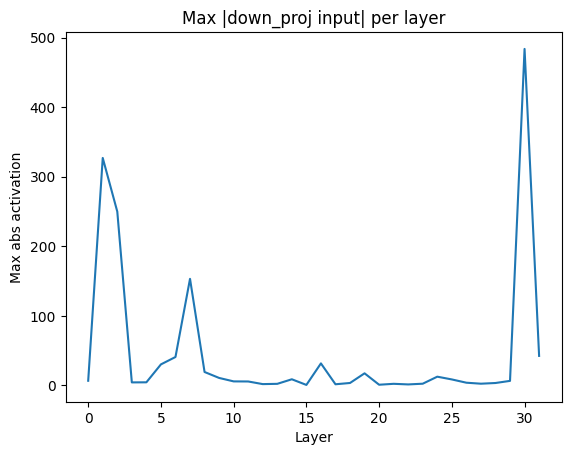

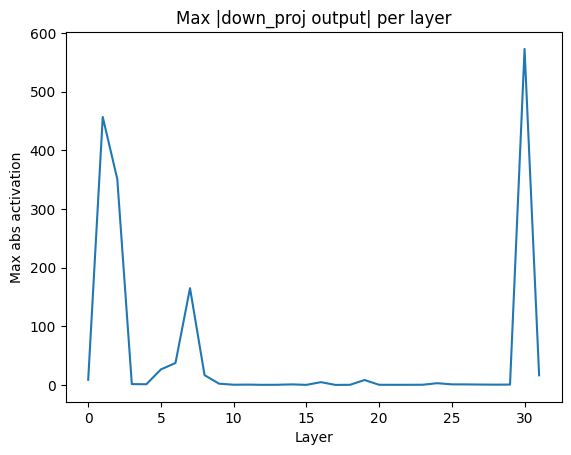

Spike layer: 30
Input channel k: 10093 Output channel j: 269
Candidate SW coordinate: down_proj.weight[j, k] = (269, 10093)


In [7]:
import torch
import matplotlib.pyplot as plt

texts = [
    "The quick brown fox jumps over the lazy dog.",
    "In a shocking finding, scientists discovered a herd of unicorns living in a remote valley.",
    "Write a short explanation of why quantization can hurt model accuracy."
]

def collect_max_abs_for_module(module, inputs, outputs, store: dict):
    # inputs[0]: [batch, seq, hidden]
    x = inputs[0].detach()
    y = outputs.detach()

    x_abs = x.abs().reshape(-1, x.shape[-1])   # [B*S, H_in]
    y_abs = y.abs().reshape(-1, y.shape[-1])   # [B*S, H_out]

    # max pro channel
    store["in_max"] = x_abs.max(dim=0).values
    store["out_max"] = y_abs.max(dim=0).values

def layer_downproj_stats(layer_idx: int, max_len: int = 128):
    mod = model.model.layers[layer_idx].mlp.down_proj
    store = {}

    h = mod.register_forward_hook(lambda m, inp, out: collect_max_abs_for_module(m, inp, out, store))

    with torch.no_grad():
        for t in texts:
            inp = tok(t, return_tensors="pt", truncation=True, max_length=max_len)
            inp = {k: v.to(model.device) for k, v in inp.items()}
            _ = model(**inp)

    h.remove()

    in_peak_val, in_peak_ch = store["in_max"].max(dim=0)
    out_peak_val, out_peak_ch = store["out_max"].max(dim=0)

    return float(in_peak_val.cpu()), int(in_peak_ch.cpu()), float(out_peak_val.cpu()), int(out_peak_ch.cpu())

# --- run over layers + plot ---
L = len(model.model.layers)
in_vals, in_chs, out_vals, out_chs = [], [], [], []

for l in range(L):
    in_v, in_c, out_v, out_c = layer_downproj_stats(l)
    in_vals.append(in_v); in_chs.append(in_c)
    out_vals.append(out_v); out_chs.append(out_c)

plt.figure()
plt.plot(range(L), in_vals)
plt.title("Max |down_proj input| per layer")
plt.xlabel("Layer"); plt.ylabel("Max abs activation")
plt.show()

plt.figure()
plt.plot(range(L), out_vals)
plt.title("Max |down_proj output| per layer")
plt.xlabel("Layer"); plt.ylabel("Max abs activation")
plt.show()

spike_layer = int(max(range(L), key=lambda i: out_vals[i]))
print("Spike layer:", spike_layer)
print("Input channel k:", in_chs[spike_layer], "Output channel j:", out_chs[spike_layer])
print("Candidate SW coordinate: down_proj.weight[j, k] =", (out_chs[spike_layer], in_chs[spike_layer]))